In [ ]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


- [Etiqueta] Enfermedad Coronaria: Si el paciente padece una enfermedad coronaria.
- Edad: Edad del paciente en años
- Sexo: Masculino o Femenino (binario)
- Peso: Peso del paciente en kilogramos
- Estatura:Estatura del paciente en centimetros
- PESONORMAL:Peso normal del paciente (binario)
- Calculo IMC:Calculo del Indice de Masa Corporal
- Hepatitis: Si es paciente Tiene Hepatitis(binario)
- FC:Frecuencia Cardiaca del paciente 
- FR:Frecuencia Respiratoria del paciente
- TAS:Presión Arterial Siastólica
- TAD:Presión Arterial Diastólica
- Na: Nivel de Sodio en la sangre (ml)
- HTA: Si el paciente padece de Hipertensión Arterial(binario)
- Tabaquismo:Si el paciente es fumador (binario)
- Diabetico:Si el paciente Sufre de Diabetes (binario)

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

In [2]:
url='https://raw.githubusercontent.com/villadasonia/Lenguaje-de-Maquina/main/dataset3.csv'
df = pd.read_csv(url,encoding = 'utf-8')
df.head(30)

,Etiqueta,Edad,Sexo,Peso,Estatura,PESONORMAL,calculoIMC,Hepatitis,FC,FR,TAS,TAD,Na,HTA,Tabaquismo,Diabetico
0,0,60,1,68,160,0,27,1,65,18,135,85,0,0,1,0
1,0,40,0,85,165,0,31,0,65,18,135,85,0,0,0,0
2,0,32,1,43,165,0,16,0,65,18,135,85,0,0,0,0
3,0,64,0,80,170,0,28,0,64,21,118,46,0,0,0,0
4,0,70,1,55,160,1,21,0,58,19,122,78,0,0,0,0
5,0,32,0,77,178,1,24,0,65,17,154,89,0,0,0,0
6,0,62,1,68,155,0,28,0,67,18,122,80,0,0,0,0
7,0,64,0,69,169,1,24,0,66,19,112,80,140,0,0,0
8,0,49,0,98,178,0,31,0,65,20,110,70,0,0,0,0
9,0,57,0,87,181,0,27,0,78,25,145,96,145,0,0,0


In [3]:
cols =["Edad","PESONORMAL","Hepatitis","FC","FR","TAS","TAD","HTA","Tabaquismo","Diabetico"];
df[cols].corr()

,Edad,PESONORMAL,Hepatitis,FC,FR,TAS,TAD,HTA,Tabaquismo,Diabetico
Edad,1.000000,-0.029346,0.030077,-0.024811,-0.004461,0.026227,0.044686,0.095407,0.075116,0.056075
PESONORMAL,-0.029346,1.000000,-0.004227,-0.099938,-0.005187,-0.146638,-0.303521,-0.216601,-0.137495,-0.159107
Hepatitis,0.030077,-0.004227,1.000000,-0.009195,-0.033429,0.014784,0.032924,-0.017685,0.122981,-0.009018
FC,-0.024811,-0.099938,-0.009195,1.000000,-0.005144,-0.117109,-0.435597,-0.278311,-0.245064,-0.173917
FR,-0.004461,-0.005187,-0.033429,-0.005144,1.000000,0.019816,0.024967,0.130496,0.121453,-0.014561
TAS,0.026227,-0.146638,0.014784,-0.117109,0.019816,1.000000,0.298779,0.107437,0.029526,0.075315
TAD,0.044686,-0.303521,0.032924,-0.435597,0.024967,0.298779,1.000000,0.449654,0.424241,0.241882
HTA,0.095407,-0.216601,-0.017685,-0.278311,0.130496,0.107437,0.449654,1.000000,0.520818,0.313426
Tabaquismo,0.075116,-0.137495,0.122981,-0.245064,0.121453,0.029526,0.424241,0.520818,1.000000,0.232012
Diabetico,0.056075,-0.159107,-0.009018,-0.173917,-0.014561,0.075315,0.241882,0.313426,0.232012,1.000000


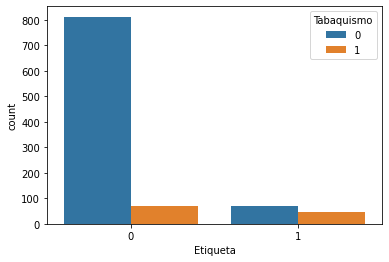

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x="Etiqueta", hue="Tabaquismo", data=df);

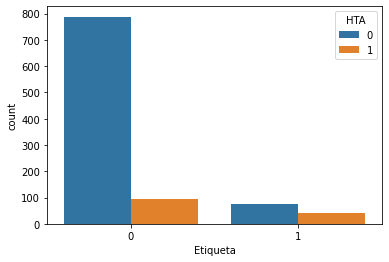

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x="Etiqueta", hue="HTA", data=df);

In [6]:
df.groupby(['Etiqueta'])['Edad'].mean()

Etiqueta
0    59.318594
1    59.627119
Name: Edad, dtype: float64

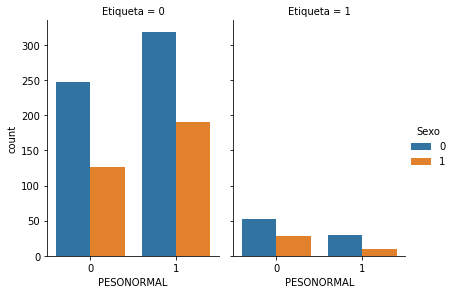

In [7]:
sns.catplot(x="PESONORMAL", hue="Sexo", col="Etiqueta",
                data=df, kind="count",
                height=4, aspect=.7);

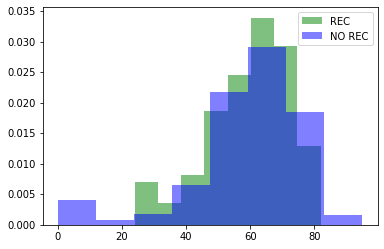

In [8]:
x1 = df.Edad[df.Etiqueta==1]
x2 = df[df.Etiqueta==0]['Edad']

# Normalizamos
kwargs = dict(alpha=0.5, bins=8, density=True, stacked=True)  # 8 bins for 8 groups por edad, 0 -10 , 11 - 20, ...

plt.hist(x1, **kwargs, color='g', label='REC');      # verde
plt.hist(x2, **kwargs, color='b', label='NO REC');   # azul
plt.legend();

In [9]:
from sklearn.model_selection import train_test_split
X= df.drop(columns = "Etiqueta")
y= df.Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state = 0,test_size=0.30)

In [10]:
model = LogisticRegression(solver='lbfgs',max_iter=1000) #, C= 1e9

model.fit(X_train, y_train)

predictions = model.predict(X_test)    ## predictions are binary classes (0 or 1)

accuracyTrain = model.score(X_train, y_train)
accuracyTest = model.score(X_test, y_test)

print("Ocurrencia del set de entrenamiento: ", accuracyTrain)
print("Ocurrencia del set de prueba: ", accuracyTest)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5).mean()

print("Ocurrencia del cross validation: ", scores)

Ocurrencia del set de entrenamiento:  0.8942857142857142
Ocurrencia del set de prueba:  0.8466666666666667
Ocurrencia del cross validation:  0.8828571428571429


In [ ]:
model.coef_

array([[-7.70863586e-03, -2.61972844e-01, -2.53297087e-02,
         5.84581763e-03, -6.59567141e-01,  5.83157126e-02,
         2.84288006e-01, -3.10632711e-02, -8.93257547e-03,
        -6.18200183e-04,  1.93606480e-02,  4.29594586e-04,
        -3.01488244e-01,  6.84012403e-01,  9.58317647e-01]])

# **Libreria Stats Model**


In [11]:
import statsmodels.api as sm

X_m = sm.add_constant(X_train)

# Salidas
logit = sm.Logit(y_train, X_m)
results = logit.fit()   #.parametros

results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.270826
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Etiqueta   No. Observations:                  700
Model:                          Logit   Df Residuals:                      684
Method:                           MLE   Df Model:                           15
Date:                Tue, 31 Aug 2021   Pseudo R-squ.:                  0.2184
Time:                        01:44:07   Log-Likelihood:                -189.58
converged:                       True   LL-Null:                       -242.56
Covariance Type:            nonrobust   LLR p-value:                 9.554e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8233     14.664     -0.465      0.642     -35.564      21.917
Edad          -0.0084      0.009     -0.936      0.349      -0.026       0.009
Sexo          -0.2698      0.327     -0.825      0.410      -0.911       0.371
Peso          -0.0668      0.090     -0.742      0.458      -0.243       0.110
Estatura       0.0480      0.089      0.542      0.588      -0.126       0.222
PESONORMAL    -0.8167      0.462     -1.768      0.077      -1.722       0.089
calculoIMC     0.1637      0.243      0.674      0.500      -0.312       0.640
Hepatitis      1.4364      1.953      0.736      0.462      -2.391       5.263
FC            -0.0308      0.011     -2.923      0.003      -0.051      -0.010
FR            -0.0065      0.043     -0.152      0.879      -0.091       0.078
TAS           -0.0005      0.008     -0.069      0.945      -0.015       0.014
TAD            0.0195      0.005      3.731      0.000       0.009       0.030
Na             0.0003      0.002      0.127      0.899      -0.004       0.005
HTA           -0.3738      0.369     -1.012      0.311      -1.098       0.350
Tabaquismo     0.7478      0.374      2.002      0.045       0.016       1.480
Diabetico      1.1524      0.449      2.564      0.010       0.272       2.033
==============================================================================
"""

In [ ]:
## quitamos columnas no significativas
cols = ["TAD","Na","Hepatitis","TAS","FR","Peso","Estatura","calculoIMC"]

X_m = X_m.drop(columns =cols)

#cols = ["EDAD","PESONORMAL","FC","Diabetico","Sexo", "HTA", "Tabaquismo"]

logit2 = sm.Logit(y_train, X_m)
results2 = logit2.fit()   #.params

results2.summary()

Optimization terminated successfully.
         Current function value: 0.284768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Etiqueta   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Tue, 31 Aug 2021   Pseudo R-squ.:                  0.1782
Time:                        00:53:39   Log-Likelihood:                -199.34
converged:                       True   LL-Null:                       -242.56
Covariance Type:            nonrobust   LLR p-value:                 6.629e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0443      0.902      2.265      0.023       0.276       3.813
Edad          -0.0048      0.008     -0.573      0.567      -0.021       0.012
Sexo          -0.1932      0.296     -0.653      0.514      -0.773       0.387
PESONORMAL    -1.1606      0.289     -4.020      0.000      -1.726      -0.595
FC            -0.0456      0.010     -4.720      0.000      -0.065      -0.027
HTA           -0.2563      0.372     -0.689      0.491      -0.985       0.472
Tabaquismo     1.0116      0.362      2.796      0.005       0.302       1.721
Diabetico      1.2420      0.444      2.795      0.005       0.371       2.113
==============================================================================
"""

In [ ]:
cols = ["Edad","Sexo","HTA"]

X_m = X_m.drop(columns =cols)

logit3 = sm.Logit(y_train, X_m)
results3 = logit3.fit()   #.parametros obtenidos en el ultimo modelo

results3.summary()

Optimization terminated successfully.
         Current function value: 0.285749
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Etiqueta   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Tue, 31 Aug 2021   Pseudo R-squ.:                  0.1754
Time:                        00:53:44   Log-Likelihood:                -200.02
converged:                       True   LL-Null:                       -242.56
Covariance Type:            nonrobust   LLR p-value:                 1.464e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5994      0.754      2.121      0.034       0.121       3.077
PESONORMAL    -1.1344      0.285     -3.975      0.000      -1.694      -0.575
FC            -0.0448      0.010     -4.686      0.000      -0.064      -0.026
Tabaquismo     0.9256      0.321      2.883      0.004       0.296       1.555
Diabetico      1.1362      0.424      2.680      0.007       0.305       1.967
==============================================================================
"""

# **Rendimiento del modelo**

In [ ]:
colu = ['PESONORMAL', 'FC', 'Tabaquismo', 'Diabetico'] 
X_test_m = sm.add_constant(X_test[colu])  

pred_train = results3.predict(X_m)    ## Resultados y Probabilidades

pred_train =  pred_train.apply(lambda x: 1 if x >0.5 else 0)

pred_test = results3.predict(X_test_m)

pred_test =  pred_test.apply(lambda x: 1 if x >0.5 else 0)

##  La función de puntuación no esta disponible en statsmodels

from sklearn.metrics import accuracy_score

accuracyTrain = accuracy_score(y_train, pred_train )
accuracyTest = accuracy_score(y_test, pred_test)

print("Precisión en el conjunto de Entrenamiento: ", accuracyTrain)

print("Precisión en el conjunto de Pruebas: ", accuracyTest)

Precisión en el conjunto de Entrenamiento:  0.8871428571428571
Precisión en el conjunto de Pruebas:  0.8466666666666667


In [ ]:
model.fit(X_train[colu], y_train).score(X_test[colu], y_test)

0.8466666666666667